In [1]:
import torch

from roi_data_layer.roidb import combined_roidb
from roi_data_layer.fss_cell_oneshot_roibatchLoader import roibatchLoader
from model.utils.config import cfg

In [2]:
imdbval_name = 'fss_cell_2020_test'
seen = 2
batch_size = 128
num_workers = 8

In [3]:
cfg.TRAIN.USE_FLIPPED = False
imdb_vu, roidb_vu, ratio_list_vu, ratio_index_vu, query_vu = combined_roidb(imdbval_name, False, seen)
imdb_vu.competition_mode(on=True)
dataset_vu = roibatchLoader(roidb_vu, ratio_list_vu, ratio_index_vu, query_vu, 1, imdb_vu.num_classes, training=False, seen=seen)

loading annotations into memory...
Done (t=1.24s)
creating index...
index created!
Loaded dataset `fss_cell_2020_test` for training
Set proposal method: gt
wrote gt roidb to /tmp2/data/cache/fss_cell_2020_test_gt_roidb.pkl
Preparing training data...
done


In [5]:
dataloader_vu = torch.utils.data.DataLoader(dataset_vu, batch_size=1,shuffle=False, num_workers=0,pin_memory=True)

In [6]:
for item in dataset_vu:
    print(len(item), item[0].size())
    break

5 torch.Size([3, 600, 600])


In [13]:
item = dataset_vu[1]

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from torchvision import transforms
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


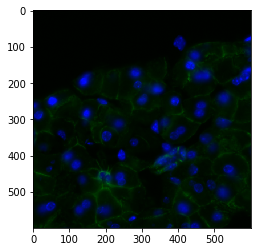

In [16]:
plt.imshow(inv_normalize(item[0]).permute(1, 2, 0).data.numpy())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


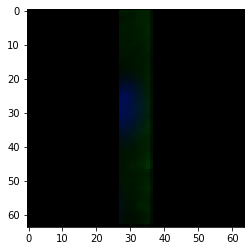

In [17]:
plt.imshow(inv_normalize(item[1]).permute(1, 2, 0).data.numpy())
plt.show()